In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("ticks")

---
# 0. Load data and inspect

In [2]:
df = pd.read_csv("titanic/train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
titanic = df.copy()

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- `PassengerID` is unique column, so is `Name`
- `Ticket` has high cardinality

In [10]:
titanic["Ticket"].value_counts().sort_values(ascending=False).head(20)

CA. 2343        7
347082          7
1601            7
347088          6
3101295         6
CA 2144         6
S.O.C. 14879    5
382652          5
PC 17757        4
113781          4
4133            4
LINE            4
2666            4
W./C. 6608      4
113760          4
349909          4
19950           4
17421           4
347077          4
363291          3
Name: Ticket, dtype: int64

---
# 1. Data Cleaning

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# fill "Age" with mean
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [14]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# fill "Embarked" with mode
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

In [16]:
titanic["Cabin"].isnull().sum() / len(titanic)

0.7710437710437711

In [17]:
# drop "Cabin" & "Ticket"
titanic = titanic.drop(columns=["Cabin", "Ticket"])

In [18]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# convert Sex to Female boolean
titanic = titanic.assign(Female=np.where(titanic["Sex"] == "female", 1, 0))
titanic = titanic.drop(columns="Sex")

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0


# 2. Feature Extraction and Engineering

In [25]:
# Calculate FamilySize
titanic = titanic.assign(FamilySize=titanic["SibSp"] + titanic["Parch"] + 1)

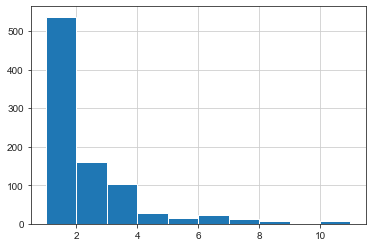

In [32]:
titanic["FamilySize"].hist();

In [31]:
# create boolean for single travellers
titanic = titanic.assign(SingleTraveller=(titanic["FamilySize"] == 1).astype(int))

In [37]:
# extract title from `Name`
titanic["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Ms                1
Mme               1
the Countess      1
Sir               1
Don               1
Capt              1
Jonkheer          1
Name: 0, dtype: int64

In [39]:
titanic = titanic.assign(Title=titanic["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0])

In [43]:
titanic["Title"] = titanic["Title"].replace("Ms", "Miss")

In [51]:
# group Titles with occurence < 10 to "Other"
to_replace = titanic["Title"].value_counts()[titanic["Title"].value_counts() < 10].keys().tolist()

In [56]:
titanic["Title"] = titanic["Title"].replace({col: "Other" for col in to_replace})

In [63]:
# bin age
titanic = titanic.assign(AgeBin=pd.cut(titanic["Age"].astype(int), 5, labels=False))

## 2.1. create dummies

In [64]:
titanic.nunique()

PassengerId        891
Survived             2
Pclass               3
Name               891
Age                 89
SibSp                7
Parch                7
Fare               248
Embarked             3
Female               2
FamilySize           9
SingleTraveller      2
Title                5
AgeBin               5
dtype: int64

In [67]:
# create dummy for first class
titanic = titanic.assign(FirstClass=np.where(titanic["Pclass"] == 1, 1, 0))

In [69]:
to_bool = ["Embarked", "Title"]
titanic = pd.get_dummies(data=titanic,
                         columns=to_bool,
                         drop_first=True)

In [72]:
titanic.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Female               int64
FamilySize           int64
SingleTraveller      int64
AgeBin               int64
FirstClass           int64
Embarked_Q           uint8
Embarked_S           uint8
Title_Miss           uint8
Title_Mr             uint8
Title_Mrs            uint8
Title_Other          uint8
dtype: object

Categorize columns

In [73]:
id_col = ["PassengerId", "Name"]
target_col = ["Survived"]
num_col = ["Age", "AgeBin", "SibSp", "Parch", "Fare", "FamilySize", "Pclass"]
cat_col = [col for col in titanic.columns if col not in id_col + target_col + num_col]

# 3. Split dataset

In [74]:
from sklearn.model_selection import train_test_split

In [103]:
train, test = train_test_split(titanic, test_size=.15, random_state=111)

train_X = train[num_col + cat_col].reset_index(drop=True)
train_y = train[target_col].reset_index(drop=True).values.ravel()
test_X = test[num_col + cat_col].reset_index(drop=True)
test_y = test[target_col].reset_index(drop=True).values.ravel()

In [104]:
train_y.sum()/len(train_y)

0.3857331571994716

In [105]:
test_y.sum()/len(test_y)

0.373134328358209

# 4. Baseline Model

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score

In [113]:
models = {"Logistic Regression:": LogisticRegression(solver="liblinear"),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(n_estimators=10)}

In [109]:
cross_validate(DecisionTreeClassifier(),
               train_X,
               train_y,
               cv=5,
               scoring="balanced_accuracy")["test_score"].mean()

0.7655810285125344

In [110]:
def validate_model(model):
    validation_results = cross_validate(model,
                                        train_X,
                                        train_y,
                                        cv=5,
                                        scoring="balanced_accuracy")
    acc_score = validation_results["test_score"].mean()
    print(f"Balanced Mean Accuracy Score: {acc_score}")

In [115]:
for key, model in models.items():
    print(f"{key}:")
    validate_model(model)
    print("------------------")

Logistic Regression::
Balanced Mean Accuracy Score: 0.7889566561716409
------------------
Decision Tree:
Balanced Mean Accuracy Score: 0.7681871885271141
------------------
Random Forest:
Balanced Mean Accuracy Score: 0.7971324070059012
------------------
